<a href="https://colab.research.google.com/github/gmqueens/KNPE261-Demos/blob/main/KNPE261_RecordAndAnalyzeHandPosition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Recorded Video

This section of the code allows you to import a recorded video using upload function in collab. The original code was tested on a facetime camera using Macbook Pro 2019.

In [ ]:
# Install the necessary libraries
!pip install mediapipe opencv-python-headless
# Import the necessary libraries
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, Video

# Upload video file
uploaded = files.upload()

# Replace 'your_video.mp4' with the path to your video file
video_path = list(uploaded.keys())[0]

# Initialize Mediapipe Hands and Drawing utilities
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Set up the Mediapipe Hands solution
# Uses Google Mediapipe Engine Solution
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# Section 1: Play the Original Unmarked Video
print("Playing the original video...")
display(Video(video_path))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


Saving IMG_0630.MOV to IMG_0630.MOV
Playing the original video...


# Read & Process the Video File

This section, reads the video file and uses the medipipe engine to detect landmarks. Finishes by plotting each landmark location in X and Y coordinates (arbitrary units).

Video successfully opened.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Finished processing video.
Playing the video with hand landmarks...


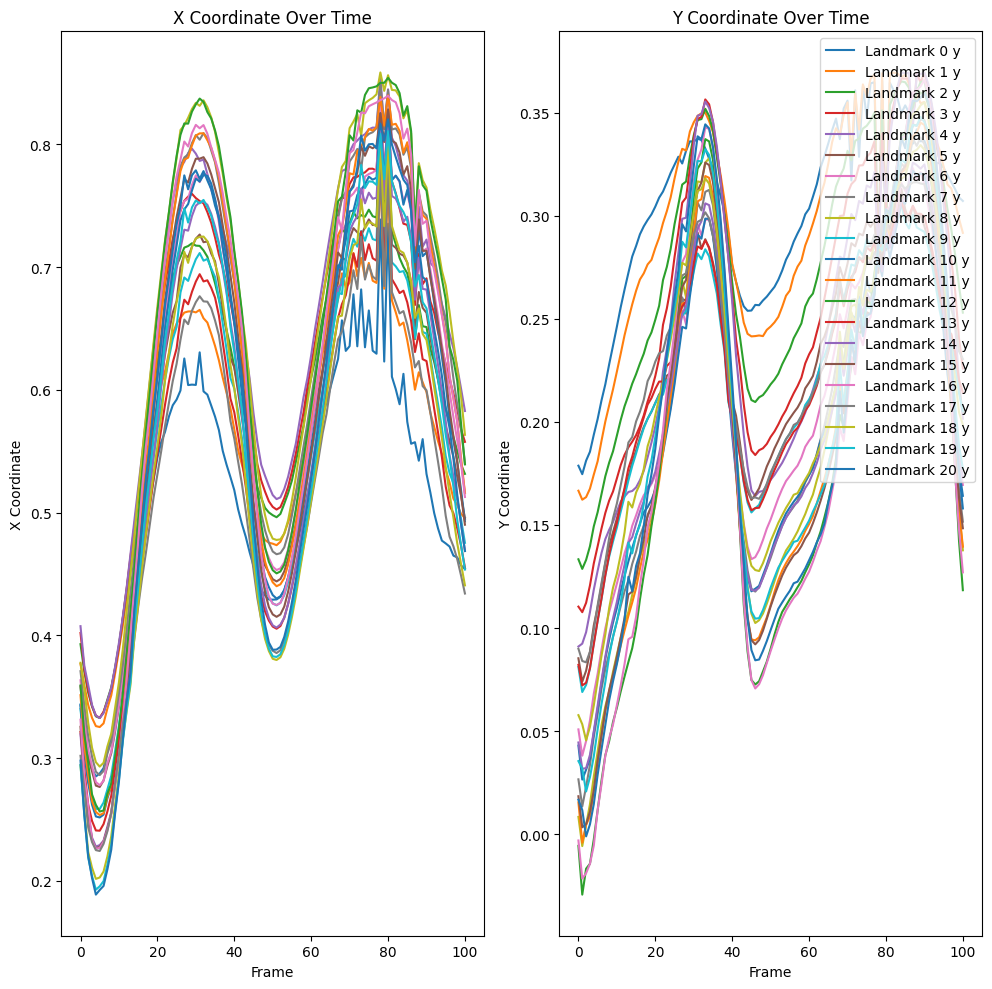

In [ ]:
# Open the video file for processing
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video successfully opened.")

# Initialize VideoWriter for the processed video

output_path = 'output_with_landmarks.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, int(cap.get(cv2.CAP_PROP_FPS)),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

# Lists to store landmarks data for plotting later
landmarks_data = []

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Finished processing video.")
        break

    # Convert the frame to RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image and find hand landmarks
    results = hands.process(image)

    # Draw hand landmarks on the frame
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Store the landmarks data
            landmarks_data.append([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark])

    # Write the frame with landmarks to the output video
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

# Section 2: Play the Video with Landmarks
print("Playing the video with hand landmarks...")
display(Video(output_path))

# Section 3: Plot the Landmarks
# Convert the landmarks_data to a list of numpy arrays for easier plotting
import numpy as np
landmarks_data = np.array(landmarks_data)

# Plot each landmark's x, y, and z over time (frames)
num_landmarks = landmarks_data.shape[1]

plt.figure(figsize=(15, 10)) # Figure size
for i in range(num_landmarks):
    plt.subplot(1, 3, 1)
    plt.plot(landmarks_data[:, i, 0], label=f'Landmark {i} x')
    plt.title('X Coordinate Over Time')
    plt.xlabel('Frame')
    plt.ylabel('X Coordinate')

    plt.subplot(1, 3, 2)
    plt.plot(landmarks_data[:, i, 1], label=f'Landmark {i} y')
    plt.title('Y Coordinate Over Time')
    plt.xlabel('Frame')
    plt.ylabel('Y Coordinate')

plt.tight_layout()
plt.legend(loc='upper right')
plt.show()



